In [1]:
from math import sqrt
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from subprocess import Popen, PIPE

In [2]:
def brownian(x0, T, n, delta, out=None):
    
    x0 = np.asarray(x0).reshape(-1)
    dt = T/n
    t = np.linspace(0.0, n*dt, n)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n-1,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    
    return np.row_stack((t,np.column_stack((x0,out))))

def excursion(n, out=None):
    bm = brownian([0, 0, 0], 1, n, 1)
    bridge = np.row_stack((bm[0], bm[1:4]-(np.outer(bm[1:,-1],bm[0]))))
    excurs = np.stack((bm[0], np.sqrt((bridge[1:4]**2).sum(axis=0))))

    return excurs

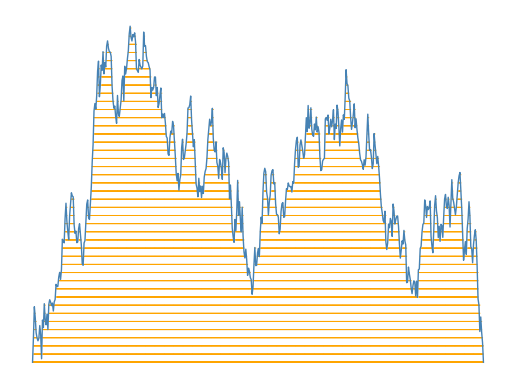

In [3]:
def mystep(x,y, ax=None, where='post', **kwargs):
    assert where in ['post', 'pre']
    x = np.array(x)
    y = np.array(y)
    if where=='post': y_slice = y[:-1]
    if where=='pre': y_slice = y[1:]
    X = np.c_[x[:-1],x[1:],x[1:]]
    Y = np.c_[y_slice, y_slice, np.zeros_like(x[:-1])*np.nan]
    if not ax: ax=plt.gca()
    return ax.plot(X.flatten(), Y.flatten(), **kwargs)


excurs = excursion(500)


for i in range(60):
    mystep(excurs[0], (excurs[1] >= i/40)*(i/40), linewidth=0.7, color='orange')

plt.plot(excurs[0], excurs[1], linewidth=1, color='steelblue')

plt.axis('off')

plt.savefig(os.getcwd() + '/CRT.pdf', format="pdf", bbox_inches = 'tight')
plt.show()

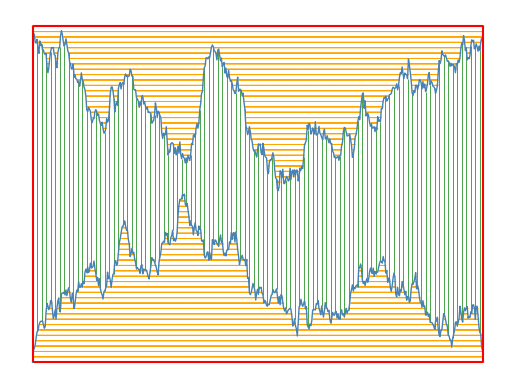

In [5]:
excurs1 = excursion(500)
excurs2 = excursion(500)


for i in range(40):
    mystep(excurs1[0], (excurs1[1] >= i/25)*(i/25), linewidth=0.7, color='orange')
    mystep(excurs2[0], 2.5-(excurs2[1] >= i/25)*(i/25), linewidth=0.7, color='orange')

plt.vlines(excurs1[0,::5],ymin=excurs1[1,::5],ymax=2.5-excurs2[1,::5], linewidth=0.5, color='green')

plt.plot(excurs1[0], excurs1[1], linewidth=1, color='steelblue')
plt.plot(excurs2[0], 2.5-excurs2[1], linewidth=1, color='steelblue')

plt.hlines([0,2.5], xmin=[0,0], xmax=[1,1], color='red')
plt.vlines([0,1], ymin=[0,0], ymax=[2.5,2.5], color='red')

plt.axis('off')

plt.savefig(os.getcwd() + '/mating.pdf', format="pdf", bbox_inches = 'tight')
plt.show()

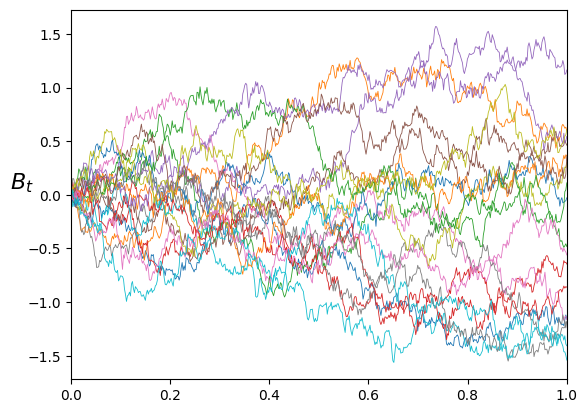

In [6]:
bms = brownian(np.zeros((20,)), 1, 500, 1)

for k in range(20):
    plt.plot(bms[0], bms[k+1],linewidth=0.6)

plt.ylabel(r'$B_t$', fontsize=16, rotation=0)
plt.xlim(0,1)
plt.savefig(os.getcwd() + '/brownian_motions.pdf', format="pdf", bbox_inches = 'tight')
plt.show()

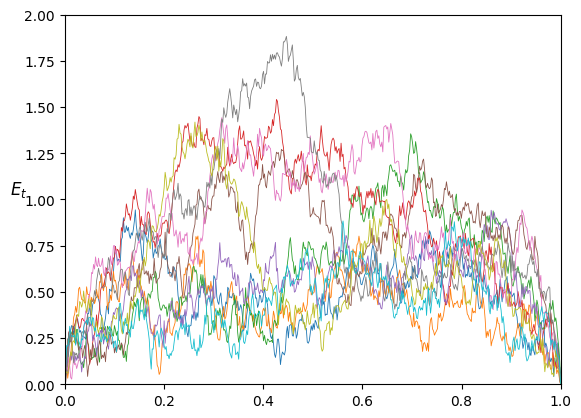

In [7]:
for k in range(10):
    excur = excursion(500)
    plt.plot(excur[0], excur[1],linewidth=0.6)

plt.ylabel(r'$E_t$', fontsize=12, rotation=0)
plt.xlim(0,1)
plt.ylim(0,2)
plt.savefig(os.getcwd() + '/brownian_excursions.pdf', format="pdf", bbox_inches = 'tight')
plt.show()

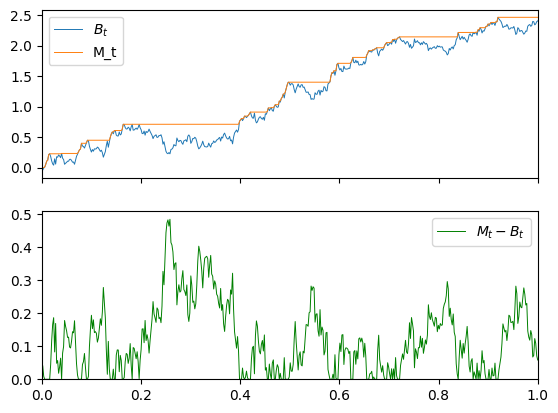

In [8]:
bm = brownian(0,1,500,1)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
plt.xlim(0,1)
ax1.plot(bm[0], bm[1], linewidth=0.7, label=r'$B_t$')
ax1.plot(bm[0], np.maximum.accumulate(bm[1]), linewidth=0.7, label=r'M_t')
ax2.plot(bm[0], np.maximum.accumulate(bm[1]) - bm[1], linewidth=0.7, label=r'$M_t-B_t$', color='g')
ax2.set_ylim(bottom=0)

ax1.legend()
ax2.legend()
plt.savefig(os.getcwd() + '/brownian_dropdown.pdf', format="pdf", bbox_inches = 'tight')
plt.show()

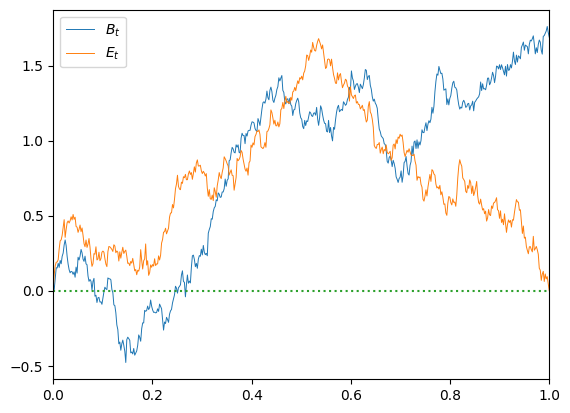

In [9]:
bm = brownian(0,1,500,1)
excurs = excursion(500)

plt.plot(bm[0], bm[1], linewidth=0.7, label=r'$B_t$')
plt.plot(excurs[0], excurs[1], linewidth=0.7, label=r'$E_t$')
plt.plot([0, 1], [0, 0], linestyle=":")
plt.xlim(0,1)
plt.legend()
plt.savefig(os.getcwd() + '/comparison1.pdf', format="pdf", bbox_inches = 'tight')
plt.show()

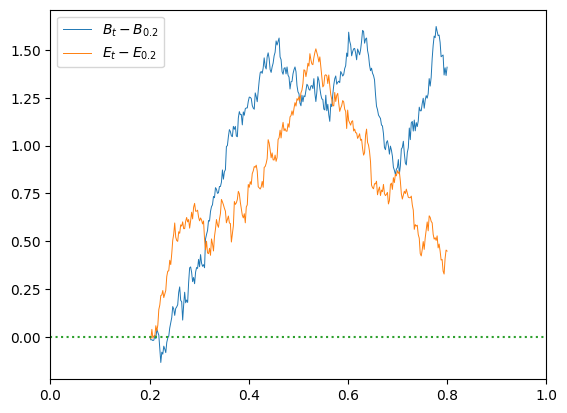

In [10]:
plt.plot(bm[0, 100:400], bm[1, 100:400]-bm[1,100], linewidth=0.7, label=r'$B_t-B_{0.2}$')
plt.plot(excurs[0, 100:400], excurs[1, 100:400]-excurs[1,100], linewidth=0.7, label=r'$E_t-E_{0.2}$')
plt.plot([0, 1], [0, 0], linestyle=":")
plt.xlim(0,1)
plt.legend()
plt.savefig(os.getcwd() + '/comparison2.pdf', format="pdf", bbox_inches = 'tight')
plt.show()